In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from notebook_load_functions import *

In [3]:
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
cases = ['c250-2048', 'c250-1024', 'c250-768', 'c250-512','c250-2560',
         'c400-2048', 'c400-1024', 'c400-768', 'c125-2048', 'c125-1024']
nd_log_list = np.linspace(-3.3, -1.7, 17)

rbins = np.logspace(-1.3, 1.3, 27)

In [4]:
from AbundanceMatching import AbundanceFunction
from urllib import urlopen

af = np.loadtxt(urlopen('https://arxiv.org/src/1304.7778v2/anc/LF_Ser.dat'), usecols=(0,1))
af[:,0] -= 5.0*np.log10(0.7)
af[:,1] = (10.**af[:,1])/(0.7**3)
af = AbundanceFunction(*af.T, ext_range=(-25, -16), faint_end_fit_points=5)

for Mr in np.arange(-22.0, -16.9, 0.5):
    print '{:.1f}  {:.3f}'.format(Mr, np.log10(af.number_density_at(Mr)))

-22.0  -3.558
-21.5  -3.062
-21.0  -2.660
-20.5  -2.350
-20.0  -2.108
-19.5  -1.915
-19.0  -1.770
-18.5  -1.652
-18.0  -1.550
-17.5  -1.458
-17.0  -1.379


In [5]:
plt.rcdefaults()
%matplotlib inline
plt.rcParams['font.size'] = 16.0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.numpoints'] = 1

In [6]:
# saves the loaded sample variance into a single file so that it loads faster in the future
'''
box_size_high = (100.0, 111.0, 125.0, 142.0, 166.0, 200.0, 250.0, 333.0)
for proxy in proxies:
    for nd_log in nd_log_list:
        for box_size in box_size_high:
            temp = load_samples(proxy, nd_log, box_size, case = 'MDhigh')
            np.save('/nfs/slac/g/ki/ki22/cosmo/iameric/resolution_study/multidark/load_samples_combined/pairs_{}/bs{:d}_nd{:.1f}.npy'.format(proxy, int(box_size), nd_log), temp)

'''
'haha'

'haha'

# HOD missing pairs

In [53]:
cases = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024', 'c400-768']
m_log_list = np.linspace(10.5, 14.5, 9)
Npartperhalo = np.zeros((len(cases),len(m_log_list)))
for j,case in enumerate(cases):
    mass = parse_boxname(case)[2]
    for k, m_log in enumerate(m_log_list):
        cut = 10.**m_log
        Npartperhalo[j,k] = cut/mass

In [54]:
misspairs = np.zeros((len(cases),len(m_log_list),len(rbins[1::2])))

for j,case in enumerate(cases):
    box_size = parse_boxname(case)[0]
    for k, m_log in enumerate(m_log_list):
        low = load_pair_count_HOD(case, m_log)
        if box_size == 250.:
            high = load_pair_count_HOD(case.partition('-')[0]+'-2560', m_log)
        else:
            high = load_pair_count_HOD(case.partition('-')[0]+'-2048', m_log)
        misspairs[j,k] = (low-high)/high
'''
for i in range(len(misspairs)):
    for j in range(len(misspairs[0])):
        for k, miss in enumerate(misspairs[i,j]):
            if miss != miss:
                misspairs[i,j,k] =0
'''
rbins[1::2]

/afs/slac.stanford.edu/u/ki/iameric/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide
/afs/slac.stanford.edu/u/ki/iameric/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


array([  0.06309573,   0.1       ,   0.15848932,   0.25118864,
         0.39810717,   0.63095734,   1.        ,   1.58489319,
         2.51188643,   3.98107171,   6.30957344,  10.        ,  15.84893192])

/afs/slac.stanford.edu/u/ki/iameric/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


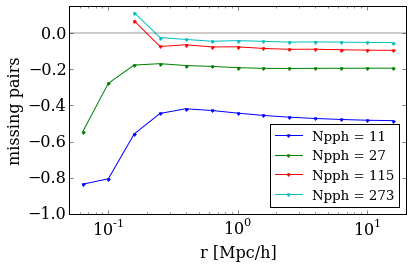

In [55]:
cases = ['c250-768' ,'c250-1024']
m_log_list_this = [10.5, 11.5]
for m_log in m_log_list_this:
    for case in cases:
        low = load_pair_count_HOD(case, m_log) 
        high = load_pair_count_HOD('c250-2560', m_log)
        Npph = 10.**m_log/ parse_boxname(case)[2]
        plt.semilogx(rbins[1::2],(low-high)/high, '.-', label = 'Npph = {}'.format(int(Npph)))
#plt.title('Npph = {:d}'.format(int(Npph)))
plt.axhline(0, lw = 0.4, c = 'k')
plt.legend(fontsize = 'small',loc = 'best')
plt.ylim(-1.0, 0.15)
plt.xlim(0.05, 20)
plt.xlabel('r [Mpc/h]')
plt.ylabel('missing pairs')
plt.tight_layout()
plt.savefig('plots/test/missingpairs_HOD_vs_r.pdf')

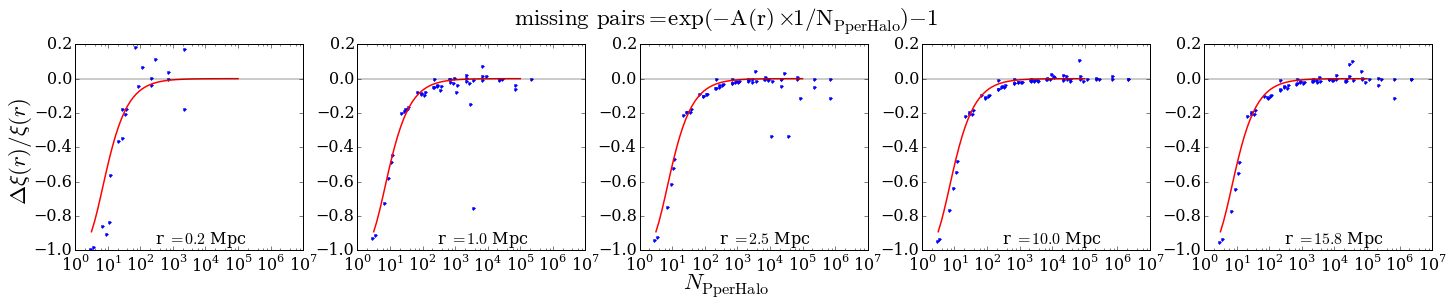

In [18]:
def fit_test(Npph):
    A = 7.
    return np.exp(-A/Npph) - 1

def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()


scales = (0.16, 1.,2.5, 10.,15.)


fig, axarr = plt.subplots(ncols=len(scales), nrows=1, figsize=(4*len(scales), 4.), sharex=True, sharey=False)
for ii, (ax, r) in enumerate(zip(axarr, scales)):
    ridx = closest_ridx(r)
    
    ax.semilogx(Npartperhalo.flatten(), misspairs[:,:,ridx].flatten(), '.', alpha=1.0,c='b')
    Npartlist = np.logspace(0.5,5,50)
    ax.semilogx(Npartlist, fit_test(Npartlist), c = 'r', lw = 1.5)
    ax.axhline(0, c='k', lw=0.4)
    ax.text(0.35, 0.1, r'r $ = {0:.1f}$ Mpc'.format(rbins[1::2][closest_ridx(r)]), transform=ax.transAxes, va='top', fontsize='medium');
    #ax.set_xlim(0.8*resolution[-1], 1.1*resolution[0])
    #if ii==0: ax.legend(frameon=False, numpoints=1,ncol=2, loc='best',fontsize='small')
    ax.set_ylim(-1, 0.2)

plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 0.9));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.03, r'$N_{{\rm PperHalo}}$', ha='center', va='center', fontsize='x-large');
fig.text(0.5, 0.95, r'$ \rm missing \, pairs  =\exp(-A(r) \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
#fig.text(0.5, 0.95, r'${\rm V_{peak} \, missing \, pairs}=\exp(-(A-B \log(r))^C \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/test/missingpairs_HOD.png'.format(proxy))

In [93]:
# fit with np.exp(-A/Npph) - 1
def fit_test(Npph_log, A):
    #A = 8.5
    return np.exp(-A/Npph_log) - 1
Npph_all = np.zeros_like(misspairs[:,:,7:])
for i in range(Npph_all.shape[-1]):
    Npph_all[:,:,i] = Npartperhalo

ridxcut = 7
y = misspairs[:,:,ridxcut:].flatten()
nanlist = np.where(y!=y)[0]
y = np.delete(y, nanlist)
xx = np.delete(Npph_all.flatten(), nanlist)
curve_fit(fit_test, xx, y,p0=8.5)

(array([ 7.83816653]), array([[ 0.22116399]]))

In [46]:
rbins[1::2]

array([  0.06309573,   0.1       ,   0.15848932,   0.25118864,
         0.39810717,   0.63095734,   1.        ,   1.58489319,
         2.51188643,   3.98107171,   6.30957344,  10.        ,  15.84893192])

/u/ki/iameric/miniconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


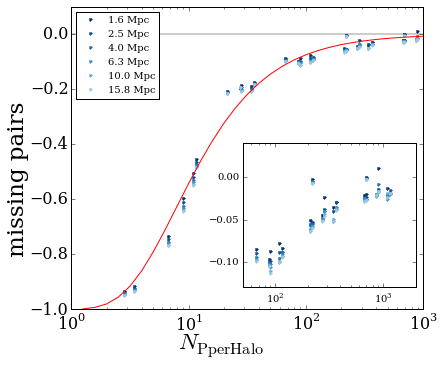

In [90]:
from palettable.colorbrewer.sequential import Blues_9
def get_color(i):
    return Blues_9.mpl_colors[-i-1]


def fit_test(Npph):
    A = 7.83816653
    return np.exp(-A/Npph) - 1

def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()


scales = (0.06, 0.16, 1.,2.5, 10.,15.)
scales = rbins[1::2][7::]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6., 5.), sharex=True, sharey=False)
for ii, r in enumerate(scales):
    ridx = closest_ridx(r)
    
    ax.semilogx(Npartperhalo.flatten(), misspairs[:,:,ridx].flatten(), '.', alpha=1.0,c=get_color(ii), label = '{:.1f} Mpc'.format(r))
Npartlist = np.logspace(0.1,5,50)
ax.semilogx(Npartlist, fit_test(Npartlist), c = 'r', lw = 1.0)
ax.axhline(0, c='k', lw=0.4)
ax.set_xlim(1., 1000.)
ax.legend(frameon=True, numpoints=1,ncol=1, loc='upper left',fontsize=10)
ax.set_ylim(-1, 0.1)

inset = plt.axes([.55, .2, .4, .4])
for ii, r in enumerate(scales):
    ridx = closest_ridx(r)    
    inset.semilogx(Npartperhalo.flatten(), misspairs[:,:,ridx].flatten(), '.', alpha=1.0,c=get_color(ii), label = '{:.1f} Mpc'.format(r))

inset.set_xlim(50,2000)
inset.set_ylim(-0.13, 0.04)
inset.set_xticks([100,1000])
inset.tick_params(labelsize = 10)

plt.tight_layout(0, rect=(0.06, 0.07, 1.0, 0.98));
fig.text(0.03, 0.5, 'missing pairs', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.035, r'$N_{{\rm PperHalo}}$', ha='center', va='center', fontsize='x-large');
#fig.text(0.6, 0.95, r'$ \rm missing \, pairs  =\exp(-A/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='large');
#fig.text(0.5, 0.95, r'${\rm V_{peak} \, missing \, pairs}=\exp(-(A-B \log(r))^C \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
plt.savefig('plots/paper/missingpairs_HOD.pdf')

# fit missing pairs

In [50]:
# fit A(r) for each r
def partperhalo(case, nd_log,r):
    cut = load_nd_limits('mvir', case)[closest_ndidx(nd_log)]
    m = parse_boxname(case)[2]
    return cut/m

cases = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024','c400-768']
#cases = ['c250-1024', 'c250-768', 'c250-512','c400-1024']
Npartperhalo = np.zeros((len(cases),len(nd_log_list)))
for j,case in enumerate(cases):
    cut = load_nd_limits('mvir', case)
    mass = parse_boxname(case)[2]
    Npartperhalo[j] = cut/mass

misspairs = np.zeros((len(proxies), len(cases),len(nd_log_list),len(rbins[1::2])))
for i,proxy in enumerate(proxies):
    for j,case in enumerate(cases):
        box_size, mass = parse_boxname(case)[1:]
        for k, nd_log in enumerate(nd_log_list):
            low = load_pair_count(proxy, case, nd_log)
            if box_size == 250.:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
            else:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            misspairs[i,j,k] = (low-high)/high

In [51]:
# remove Npph < 10
for i,ii in enumerate(Npartperhalo):
    for j,jj in enumerate(ii):
        if jj < 10:
            print i,j, jj
Npartperhalo[6,16] = np.nan
misspairs[:,6,16,:] = np.nan

6 16 1.99998037778


In [52]:
from scipy.optimize import curve_fit
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()
def closest_ndidx(nd):
    return np.abs(nd_log_list-nd).argmin()
def fitmiss(x,a):
    return np.exp(-a/x) - 1.
def remove_nan(arr):
    return arr[arr==arr]

alist = np.zeros((len(proxies), len(rbins[1::2])))
for pidx, proxy in enumerate(proxies):
    for ridx, r in enumerate(rbins[1::2]):
        alist[pidx,ridx] = curve_fit(fitmiss, remove_nan(Npartperhalo.flatten()), remove_nan(misspairs[pidx,:,:,ridx].flatten()), p0=0.03)[0]
        

In [13]:
from scipy import interpolate

a_interpolate = [[] for i in range(4)]
for i in range(len(proxies)):
    a_interpolate[i] = interpolate.interp1d(rbins[1::2], alist[i])

def missing_pairs_int(proxy, Npph, r):
    return fitmiss(Npph, a_interpolate[proxies.index(proxy)](r))



/u/ki/iameric/miniconda/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


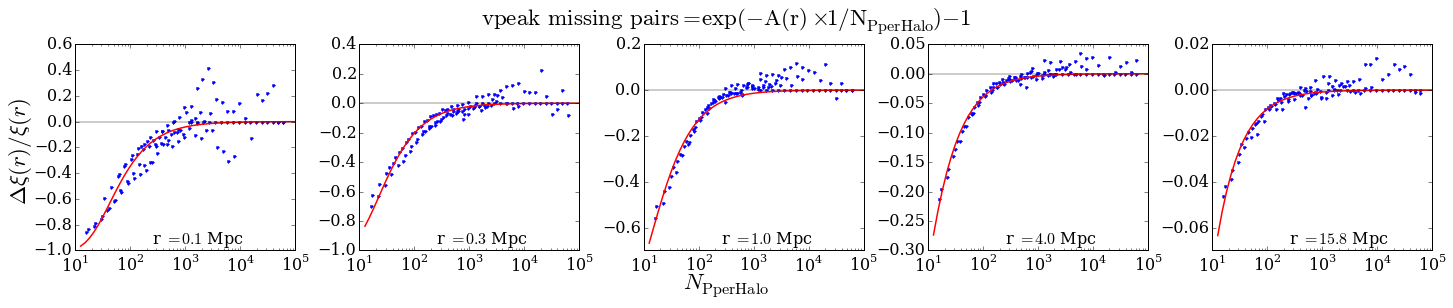

In [14]:
cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = ['c250-768', 'c250-512','c400-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)


proxy = 'vpeak'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
pidx = proxies.index(proxy)
scales = (0.06,1.,5.,15.)
scales = rbins[1::2][::3]


fig, axarr = plt.subplots(ncols=len(scales), nrows=1, figsize=(4*len(scales), 4.), sharex=True, sharey=False)
for ii, (ax, r) in enumerate(zip(axarr, scales)):
    ridx = closest_ridx(r)
    
    ax.semilogx(Npartperhalo.flatten(), misspairs[pidx,:,:,ridx].flatten(), '.', label='nd='+str(nd_log),alpha=1.0,c='b')
    Npartlist = np.logspace(1.1,5,50)
    ax.semilogx(Npartlist, [missing_pairs_int(proxy, n, r) for n in Npartlist], c = 'r', lw = 1.5)
    ax.axhline(0, c='k', lw=0.4)
    ax.text(0.35, 0.1, r'r $ = {0:.1f}$ Mpc'.format(rbins[1::2][closest_ridx(r)]), transform=ax.transAxes, va='top', fontsize='medium');
    #ax.set_xlim(0.8*resolution[-1], 1.1*resolution[0])
    #if ii==0: ax.legend(frameon=False, numpoints=1,ncol=2, loc='best',fontsize='small')
            
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 0.9));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.03, r'$N_{{\rm PperHalo}}$', ha='center', va='center', fontsize='x-large');
fig.text(0.5, 0.95, r'$ \rm  {0} \, missing \, pairs  =\exp(-A(r) \times 1/N_{{\rm PperHalo}})-1$'.format(proxy), ha='center', va='center', fontsize='x-large');
#fig.text(0.5, 0.95, r'${\rm V_{peak} \, missing \, pairs}=\exp(-(A-B \log(r))^C \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/test/missingpairs_{}_Npperhalo.png'.format(proxy))

In [15]:
rbins[1::2]

array([  0.06309573,   0.1       ,   0.15848932,   0.25118864,
         0.39810717,   0.63095734,   1.        ,   1.58489319,
         2.51188643,   3.98107171,   6.30957344,  10.        ,  15.84893192])

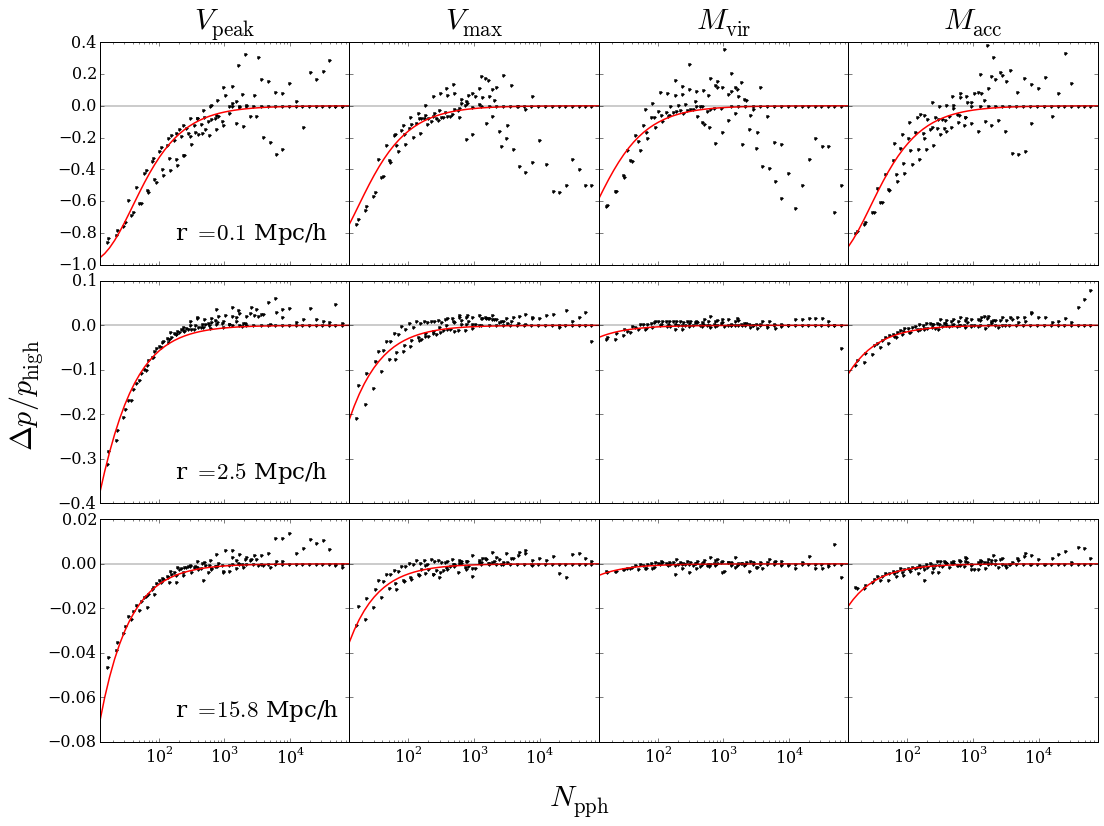

In [16]:
import matplotlib.gridspec as gridspec

cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = ['c250-768', 'c250-512','c400-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)


proxy = 'macc'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
pidx = proxies.index(proxy)
scales = (0.07,2.5,15.)
#scales = rbins[1::2][::3]


fig, ax = plt.subplots(ncols = len(proxies) , nrows=len(scales),  figsize=(4*len(proxies), 4.*len(scales)),\
                       sharex=True, sharey='row')
#fig.subplots_adjust(wspace=0)

for ii, (axarr, r) in enumerate(zip(ax, scales)):
    ridx = closest_ridx(r)
    for jj, (ax_this, proxy) in enumerate(zip(axarr, proxies)):
        pidx = proxies.index(proxy)

        ax_this.semilogx(Npartperhalo.flatten(), misspairs[pidx,:,:,ridx].flatten(), '.', \
                         label='nd='+str(nd_log), alpha=1.0,c='k')
        Npartlist = np.logspace(1.1,4.9,51)
        ax_this.semilogx(Npartlist, [missing_pairs_int(proxy, n, r) for n in Npartlist], c = 'r', lw = 1.5)
        ax_this.axhline(0, c='k', lw=0.4)
        if ii==0: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]), fontsize=30,y=1.04);
        if jj==0: ax_this.text(0.3, 0.2, r'r $ = {0:.1f}$ Mpc/h'.format(rbins[1::2][closest_ridx(r)]), \
                               transform=ax_this.transAxes,va='top', fontsize='x-large');
        if ii==0: ax_this.set_ylim(-1., 0.4)
        ax_this.set_xlim(Npartlist[0], Npartlist[-1])

plt.tight_layout(0, rect=(0.04, 0.07, 0.95, 0.95));
fig.text(0.02, 0.5, r'$\Delta p/  p_{\rm high}$', ha='center', va='center', rotation='vertical', fontsize=30);
fig.text(0.5, 0.03, r'$N_{{\rm pph}}$', ha='center', va='center', fontsize=30);
#fig.text(0.5, 0.95, r'$ \rm  {0} \, missing \, pairs  =\exp(-A(r) \times 1/N_{{\rm PperHalo}})-1$'.format(proxy), ha='center', va='center', fontsize='x-large');
#fig.text(0.5, 0.95, r'${\rm V_{peak} \, missing \, pairs}=\exp(-(A-B \log(r))^C \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
plt.savefig('plots/paper/missingpairs_Npperhalo.pdf')

# fit sample variance

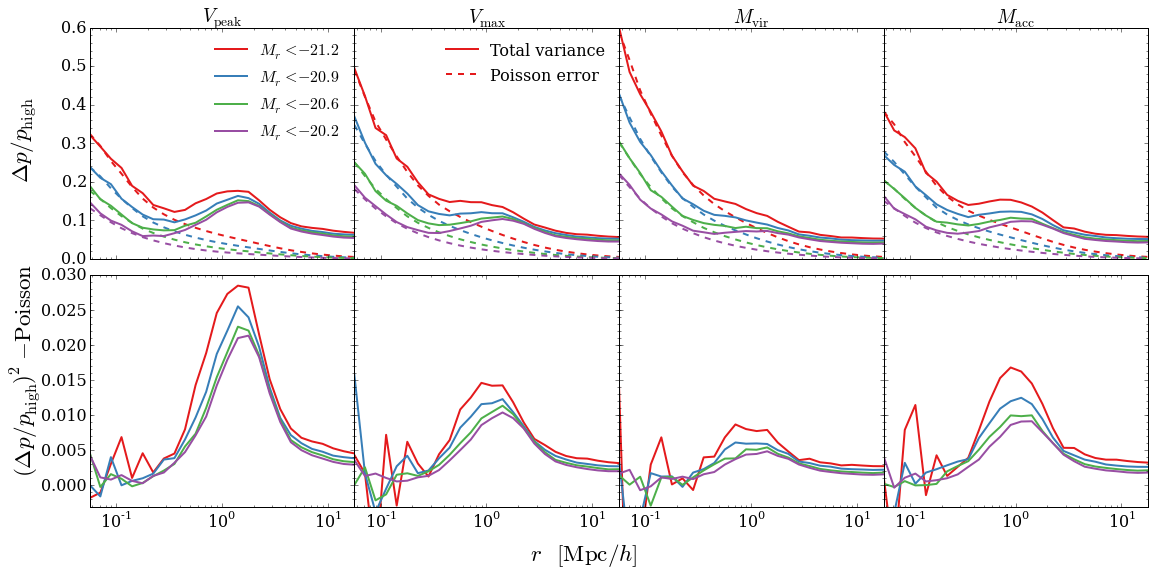

In [17]:
from palettable.colorbrewer.qualitative import Set1_4
def get_color(i):
    return Set1_4.mpl_colors[i]

x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir','macc']
nd_log_list_this = (-2.8, -2.6,-2.4, -2.2)
box_size = 125.
case = 'MDhigh'

fig, axarr = plt.subplots(ncols=len(proxies), nrows= 2 , figsize=(4*len(proxies), 4.*2), sharex=True, sharey='row')


for i, (ax, proxy) in enumerate(zip(axarr[0], proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1./np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y, c = get_color(j) , lw=2, label=r'$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) )
        ax.semilogx(x, y_poisson, c = get_color(j) , lw=2,ls='--')
        
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0,0.6)
    ax.minorticks_on()
    ax.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
    if not i: ax.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
    if i==1: ax.legend(['Total variance','Poisson error'],loc='best', frameon=False, ncol=1, fontsize='medium')

for i, (ax, proxy) in enumerate(zip(axarr[1], proxies)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1./np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2)        
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-0.003,0.03)
    ax.minorticks_on()
        
plt.tight_layout(0, rect=(0.03, 0.07, 0.99, 0.98));
fig.text(0.015, 0.75, r'$\Delta p/ p_{\rm high}$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.015, 0.35, r'$(\Delta p/ p_{\rm high})^2 - {\rm Poisson }$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.03, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/paper/multidark_sample_variance_vs_poisson.pdf')

In [18]:
case = 'MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
box_size_this = (100.,111., 125.,142., 166.,200.,250.,333.)
box_size_high = (100.,111., 125.,142., 166.,200.,250.,333.)
x = 0.5*(rbins[:-1] + rbins[1:])
error = np.zeros((len(box_size_this), len(nd_log_list),len(proxies), len(x)))

for i, box_size in enumerate(box_size_this):
    for j, nd_log in enumerate(nd_log_list):
        for k, proxy in enumerate(proxies):
            samples = load_samples(proxy, nd_log, box_size, case)
            y = np.std(samples, axis=0)/np.mean(samples, axis=0)
            y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
            error[i,j,k] = y**2 - y_poisson**2
            #error[i,j,k] = np.std(samples, axis=0)/np.mean(samples, axis=0)

In [19]:
from scipy.optimize import curve_fit
def fitfunc(x,a,b,c):
    return a + b*x**-c
def fitfunc2(x,b,c):
    return b*x**-c

x = 0.5*(rbins[1:]+rbins[:-1])

clist = np.zeros((len(proxies), len(x),3))
#clist = np.zeros((len(x),2))
for i,proxy in enumerate(proxies):
    for j,r in enumerate(x):
        if proxy == 'vpeak' and r > 0.1:
            if 0.1 < r and r < 0.35:
                nd_cut = 5
            elif r > 0.35:
                nd_cut = 0
            clist[i,j] = curve_fit(fitfunc, 10.**nd_log_list[nd_cut:], error[0,nd_cut:,i,j],p0=[0.005,3e-6,1.05],\
                                   bounds = ([0,0,0],[np.inf, np.inf, np.inf]))[0]
        elif r > 0.4:
            clist[i,j] = curve_fit(fitfunc, 10.**nd_log_list, error[0,:,i,j],p0=[0.005,3e-6,1.05],\
                                   bounds = ([0,0,0],[np.inf, np.inf, np.inf]))[0]
        #clist[i] = curve_fit(fitfunc, 10.**nd_log_list, error[0,:,i+10],p0=[ 0.007,1.8])[0]
'''
# make sure that "a" is positive. If it's negative, let "a" be zero and fit only b and c. 
clist2 = np.zeros((len(proxies), len(x), 2))
for i, proxy in enumerate(proxies):
    for j, r in enumerate(x):
        if r>0.4:
            clist2[i,j] = curve_fit(fitfunc2, 10.**nd_log_list, error[0,:,i,j],p0=[3e-6,1.05])[0]
negidx = np.array([l[:-1] for l in np.array(np.where(clist<0)).T if l[-1]==0])
for i,j in negidx:
    clist[i,j,0] = 0
    clist[i,j,1:] = clist2[i,j]
'''
123

123

### boxsize

In [21]:
case = 'MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
box_size_this = (100.,111., 125.,142., 166.,200.,250.,333.)
box_size_high = (100.,111., 125.,142., 166.,200.,250.,333.)
x = 0.5*(rbins[:-1] + rbins[1:])
error = np.zeros((len(box_size_this), len(nd_log_list),len(proxies), len(x)))

for i, box_size in enumerate(box_size_this):
    for j, nd_log in enumerate(nd_log_list):
        for k, proxy in enumerate(proxies):
            samples = load_samples(proxy, nd_log, box_size, case)
            y = np.std(samples, axis=0)/np.mean(samples, axis=0)
            y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
            error[i,j,k] = y**2 - y_poisson**2
            #error[i,j,k] = np.std(samples, axis=0)/np.mean(samples, axis=0)

(array([  2.19443693e+05,   2.67439470e+00]), 0.0829434551445343)

/u/ki/iameric/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


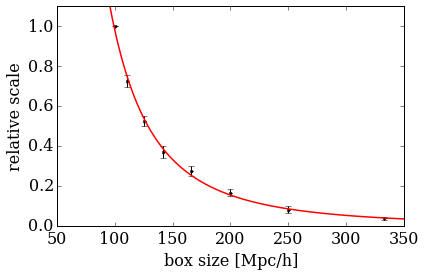

In [22]:
ratiolist = [[] for i in range(len(box_size_this)-1)]
x = 0.5*(rbins[1:]+ rbins[:-1])
for i,nd_log in enumerate(nd_log_list):
    for j in range(len(proxies)):
        for k,r in enumerate(x):
            if r > 1.0 and nd_log > -3.0:
                for l in range(len(box_size_this)-1):
                    ratiolist[l].extend([error[1+l, i,j,k]/error[0, i,j,k]])

ratiolist = np.array(ratiolist)
boxscale = np.insert(np.median(ratiolist,axis=-1),0,1)

def f(boxsize,a, b):
    return a*boxsize**-b
boxpara, boxcov = curve_fit(f, box_size_this, boxscale)

def boxfit(boxsize):
    return boxpara[0]*boxsize**-boxpara[1]

errorbar = np.insert(np.std(ratiolist, axis=-1),0,0)

fig = plt.figure(figsize = (6,4))
plt.errorbar(box_size_this, np.insert(np.mean(ratiolist, axis = -1),0,1),yerr = errorbar, fmt='.',c='k')
xx = np.linspace(95,350,100)
fit = boxfit(xx)
plt.plot(xx,fit, lw=1.5, c='r')

plt.tight_layout(rect=[0.02,0.02,1.0,1.0])
plt.xlabel('box size [Mpc/h]')
plt.ylabel('relative scale')
#plt.title('r dependence of sample variance')
plt.ylim(0,1.1)
#plt.savefig('plots/paper/boxsize_dependence.pdf')

boxpara, boxcov[1,1]**0.5

In [23]:
'''
# lowres boxsize investigation
case = 'MDlow'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
box_size_this = (125.,250.,333.)
box_size_low = (125.,250.,333.)
nd_log_list_this = np.linspace(-3.3, -2.0, 14)
x = 0.5*(rbins[:-1] + rbins[1:])
error = np.zeros((len(box_size_this), len(nd_log_list_this),len(proxies), len(x)))

for i, box_size in enumerate(box_size_this):
    for j, nd_log in enumerate(nd_log_list_this):
        for k, proxy in enumerate(proxies):
            samples = load_samples(proxy, nd_log, box_size, case)
            y = np.std(samples, axis=0)/np.mean(samples, axis=0)
            y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
            error[i,j,k] = y**2 - y_poisson**2
            #error[i,j,k] = np.std(samples, axis=0)/np.mean(samples, axis=0)

ratiolist = [[],[]]
x = 0.5*(rbins[1:]+ rbins[:-1])
for i,nd_log in enumerate(nd_log_list_this):
    for j in range(len(proxies)):
        for k,r in enumerate(x):
            if r > 0.9 and nd_log > -3.0:
                for l in range(len(box_size_this)-1):
                    ratiolist[l].extend([error[1+l, i,j,k]/error[0, i,j,k]])

ratiolist = np.array(ratiolist)
errorbar_low = np.insert(np.std(ratiolist, axis=-1),0,0)
boxscale_lowres = np.insert(np.mean(ratiolist,axis=-1),0,1)

def f(boxsize,a, b):
    return a*boxsize**-b

test = curve_fit(f, np.concatenate((box_size_high, box_size_low)), np.concatenate((boxscale, boxscale_lowres)))[0]
test = curve_fit(f, box_size_low, boxscale_lowres)[0]
test = curve_fit(f, box_size_high, boxscale)[0]
xx = np.linspace(100,400, 100)
plt.plot(xx, f(xx, *test), lw=1.5)
plt.errorbar(box_size_high, boxscale,yerr = errorbar,lw = 1,fmt='.', label="MDhigh")
plt.errorbar(box_size_low, boxscale_lowres,yerr = errorbar_low,lw = 1,fmt='.', label="MDlow")
plt.xlabel('boxsize [Mpc]')
plt.ylabel('relative scale')
plt.title(r'$f \propto {\rm box}^{-2.58}$')
plt.legend(frameon=False )
plt.ylim(0,1.1)
#plt.savefig('plots/sample_variance_boxsize_dependence_fit.png')
'''
123

123

In [24]:
'''
boxfit = interpolate.interp1d(box_size_this, boxscale, 'cubic')

xx = np.linspace(box_size_this[0], box_size_this[-1], 100)
plt.plot(xx, boxfit(xx))
plt.plot(box_size_this, boxscale,'o')
'''
def f(boxsize,a, b):
    return a*boxsize**-b
boxpara = curve_fit(f, box_size_high, boxscale)[0]

def boxfit(boxsize):
    return boxpara[0]*boxsize**-boxpara[1]

def inverse_boxfit(ratio):
    return (ratio/boxpara[0])**(-1./boxpara[1])

In [25]:
def fitfunc(x,a,b,c):
    return a + b*x**-c


def sample_variance(proxy, boxsize, r, nd_log):
    if hasattr(r, '__len__'):
        fit = np.zeros(len(r))
        for i,rr in enumerate(r):
            para = clist[proxies.index(proxy), np.abs(x-rr).argmin()]
            fit[i] = fitfunc(10.**nd_log, para[0], para[1], para[2])*boxfit(boxsize)
        return fit
    para = clist[proxies.index(proxy), np.abs(x-r).argmin()]
    return boxfit(boxsize)*fitfunc(10.**nd_log, para[0], para[1], para[2])


def sample_variance_int(proxy, boxsize, r, nd_log):
    if r == x[-1]:
        return sample_variance(proxy, boxsize, r, nd_log)
    ridx = np.searchsorted(x, r)
    rl, rr = x[ridx-1], x[ridx]
    dl, dr = r - rl, rr- r
    left = sample_variance(proxy, boxsize, rl, nd_log)
    right = sample_variance(proxy, boxsize, rr, nd_log)
    return (left*dr + right*dl)/(rr-rl)


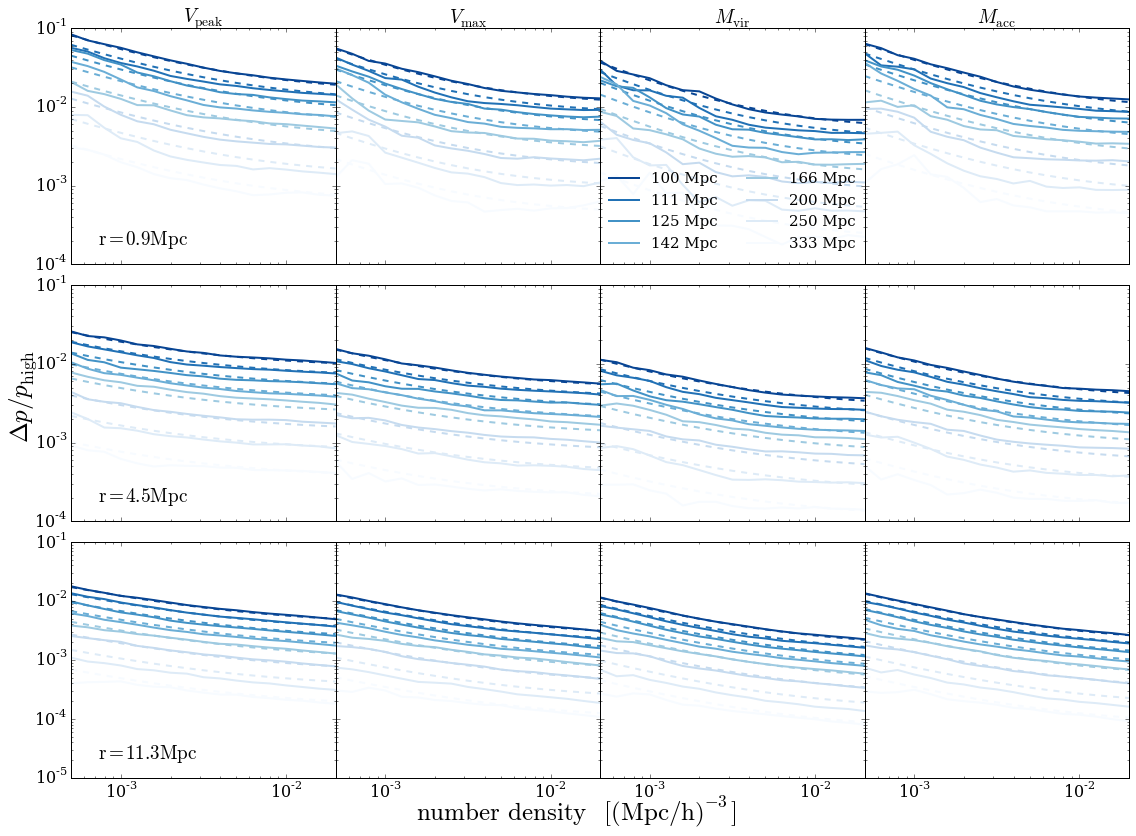

In [27]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]
x = 0.5*(rbins[:-1] + rbins[1:])
def closest_ridx(r):
    return np.abs(x-r).argmin()

case='MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
scales = [0.9, 5., 11.]
box_size_this = (100.,111.,125.,142.,166.,200.,250.,333.)
#box_size_this = (200.,250.,333.)

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(scales), figsize=(4*len(proxies), 4*len(scales)), \
                       sharex=True, sharey='row')
for i, (ax_row, scale) in enumerate(zip(ax, scales)):
    ridx = closest_ridx(scale)
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        pidx = proxies.index(proxy)
        for ii, box_size in enumerate(box_size_this):
            ax_this.semilogx(10.**nd_log_list, error[ii,:,pidx,ridx], '-',lw=2,c=get_color(ii), \
                             label='{} Mpc'.format(int(box_size)))
            fit = sample_variance(proxy, box_size, scale, nd_log_list)
            ax_this.loglog(10.**nd_log_list,fit, '--',lw=2,c=get_color(ii))
        #plot settings:
        ax_this.set_xlim(10.**nd_log_list[0],10.**nd_log_list[-1]);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.1, 0.15, r'${{\rm r}} = {0:.1f} {{\rm Mpc}}$'.format(x[ridx]),\
                               transform=ax_this.transAxes, va='top', fontsize='large');
        if i==0 and j==2: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize=15, numpoints=1);
        #if i==0 and j==3: ax_this.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, numpoints=1 , fontsize='medium');    
plt.tight_layout(0, rect=(0.03, 0.03, 0.98, 0.95));
fig.text(0.02, 0.5, r'$\Delta p / p_{\rm high}$', ha='center', va='center', rotation='vertical', fontsize=25);
fig.text(0.5, 0.02, r'${\rm number \, density} \; [{{\rm (Mpc/h)}}^{-3}]$', ha='center', va='center', fontsize=25);
#fig.text(0.3, 0.98, 'Sample variance vs. number density', fontsize='x-large')
#plt.savefig('plots/paper/sample_variance_fit.png')

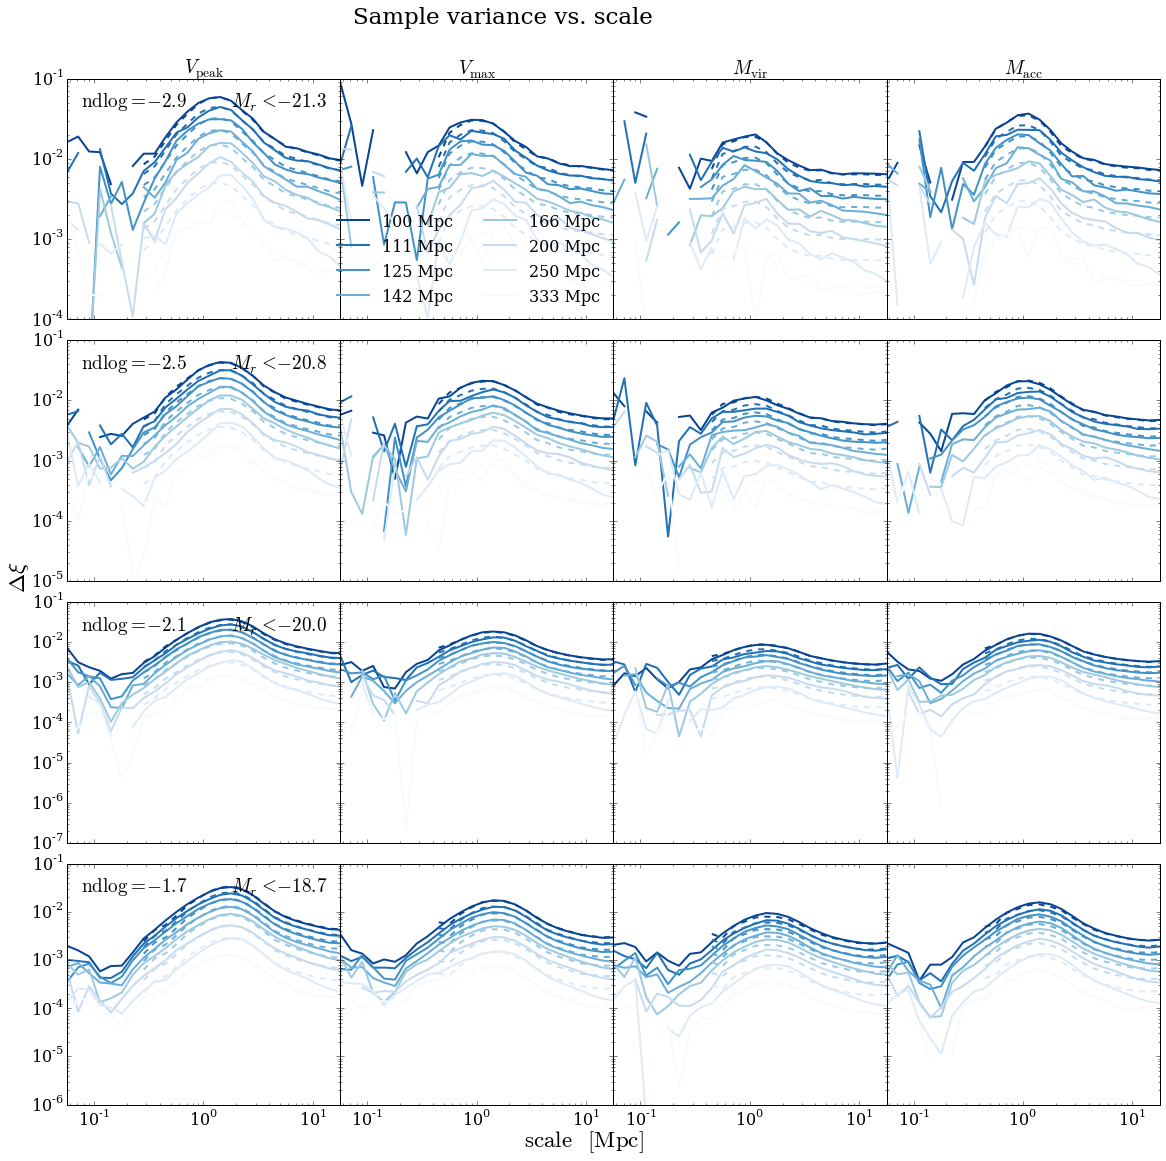

In [28]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]
x = 0.5*(rbins[:-1] + rbins[1:])
def closest_ridx(r):
    return np.abs(x-r).argmin()

case='MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
scales = [ 1.3,5, 10.]
nd_log_list_this = (-2.9,-2.5,-2.1,-1.7)
box_size_this = (100.,111.,125.,142.,166.,200.,250.,333.)
#box_size_this = (200.,250.,333.)
error = np.zeros((len(box_size_this), len(x)))
ridxcut = 7


fig, ax = plt.subplots(ncols=len(proxies), nrows=len(nd_log_list_this), figsize=(4*len(proxies), 4*len(nd_log_list_this)), sharex=True, sharey='row')
for i, (ax_row, nd_log) in enumerate(zip(ax, nd_log_list_this)):
    ridx = closest_ridx(scale)
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        for ii, box_size in enumerate(box_size_this):
            samples = load_samples(proxy, nd_log, box_size, case)
            y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
            y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
            error[ii] = y**2 - y_poisson**2
            #ax_this.semilogx(x[ridxcut:], error[ii][ridxcut:], '-',lw=2,c=get_color(ii), label='{} Mpc'.format(int(box_size)))
            ax_this.semilogx(x, error[ii], '-',lw=2,c=get_color(ii), label='{} Mpc'.format(int(box_size)))
            fit = sample_variance(proxy, box_size, x, nd_log)
            ax_this.loglog(x[ridxcut:],fit[ridxcut:], '--',lw=2,c=get_color(ii))
        #plot settings:
        ax_this.set_xlim(x[0],x[-1]);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.05, 0.95, r'${{\rm ndlog}} = {0:.1f} $'.format(nd_log), transform=ax_this.transAxes, va='top', fontsize='large');
        if not j: ax_this.text(0.6, 0.95, r'$M_r < {:.1f}$'.format(af.match(10.0**nd_log)), transform=ax_this.transAxes, va='top', fontsize='large');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize='medium', numpoints=1);
        #if i==0 and j==3: ax_this.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, numpoints=1 , fontsize='medium');    
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'$\Delta \xi$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'${\rm scale} \; [{\rm Mpc}]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Sample variance vs. scale', fontsize='x-large')

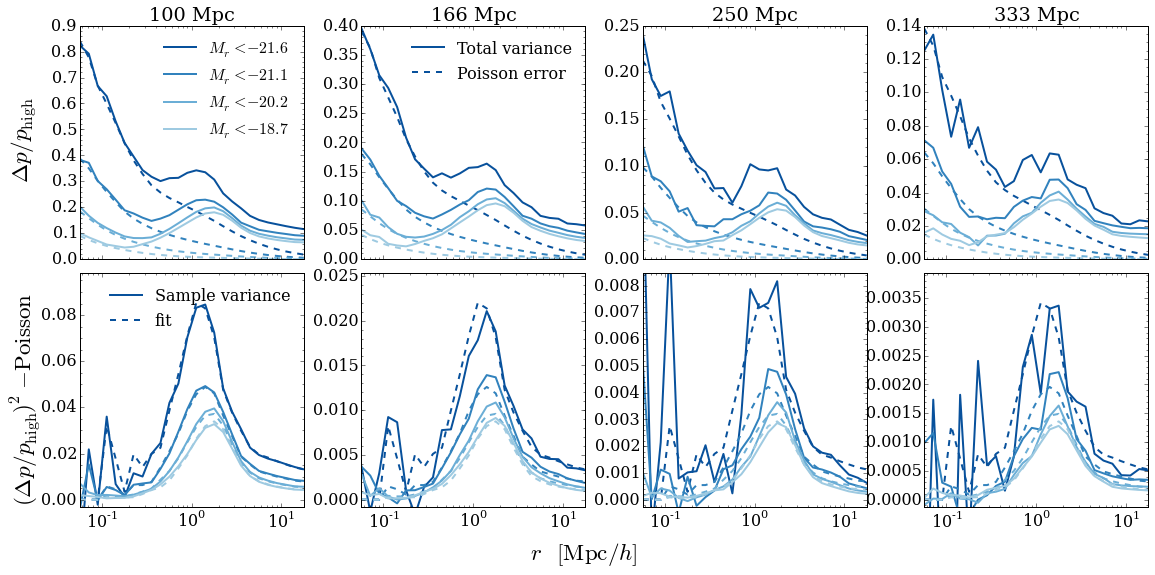

In [29]:
from palettable.colorbrewer.sequential import Blues_6
def get_color(i):
    return Blues_6.mpl_colors[::-1][i]

x = 0.5*(rbins[1:] + rbins[:-1])
proxies = ['vpeak', 'vmax', 'mvir','macc']
nd_log_list_this = (-3.2, -2.7,-2.2, -1.7)
box_size_this = (100., 166., 250., 333.)
case = 'MDhigh'
proxy = 'vpeak'

fig, axarr = plt.subplots(ncols=len(proxies), nrows= 2 , figsize=(4*len(box_size_this), 4.*2), sharex=True, sharey=False)


for i, (ax, box_size) in enumerate(zip(axarr[0], box_size_this)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1./np.sqrt(np.mean(samples, axis=0))
        ax.semilogx(x, y, c = get_color(j) , lw=2, label=r'$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) )
        ax.semilogx(x, y_poisson, c = get_color(j) , lw=2,ls='--')
        
    ax.set_xlim(x[0], x[-1])
    #ax.set_ylim(0,0.6)
    ax.minorticks_on()
    ax.set_title('{:d} Mpc'.format(int(box_size)));
    if not i: ax.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
    if i==1: ax.legend(['Total variance','Poisson error'],loc='best', frameon=False, ncol=1, fontsize='medium')

for i, (ax, box_size) in enumerate(zip(axarr[1], box_size_this)):
    for j, nd_log in enumerate(nd_log_list_this):
        samples = load_samples(proxy, nd_log, box_size, case)
        y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
        y_poisson = 1./np.sqrt(np.mean(samples, axis=0))
        yfit = sample_variance(proxy, box_size, x, nd_log)
        ax.semilogx(x, y**2 - y_poisson**2, c = get_color(j) , lw=2)   
        ax.semilogx(x, yfit, c = get_color(j) , lw=2, ls = '--')   
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-0.003*boxfit(box_size),0.1*boxfit(box_size))
    if i==0: ax.legend(['Sample variance', 'fit'],loc='best', frameon=False, ncol=1, fontsize='medium')
    ax.minorticks_on()
        
plt.tight_layout(0, rect=(0.03, 0.07, 0.99, 0.98));
fig.text(0.015, 0.75, r'$\Delta p/ p_{\rm high}$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.015, 0.30, r'$(\Delta p/ p_{\rm high})^2 - {\rm Poisson }$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.03, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/paper/sample_variance_poisson_fit.pdf')

## criteria plot
* given nd, boxsize, r  =>  minimum resolution requirement M
* x-axis should be scale r
* different lines for nd
* rows of boxsize
* columns of proxies

In [30]:
cases = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']

Npph_arr = []
nd_log_arr = []
M_list_arr = []
for case in cases:
    m = parse_boxname(case)[2]
    cut = load_nd_limits('mvir', case)
    Npph_arr.extend(cut/m)
    M_list_arr.extend(np.ones_like(cut)*m)
    nd_log_arr.extend(nd_log_list)
Npph_arr = np.array(Npph_arr)
nd_log_arr = np.array(nd_log_arr)
M_list_arr = np.array(M_list_arr)
    
para_nd_M_N = np.polyfit(np.log10(10**-nd_log_arr/M_list_arr), np.log10(Npph_arr),1)
def nd_M_2_Npph(nd_log, M):
    return 10**(para_nd_M_N[0]*(-nd_log-np.log10(M)) +para_nd_M_N[1]) 


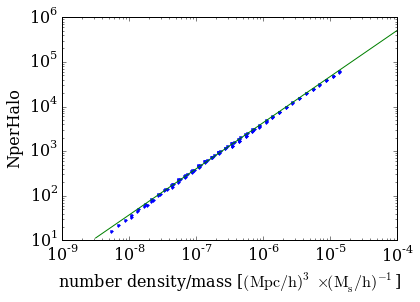

In [31]:
plt.loglog(10**-nd_log_arr/ M_list_arr, Npph_arr, '.')
xx = np.linspace(-8.5, -4., 100)
fit = 10.**(para_nd_M_N[0]*xx + para_nd_M_N[1])
plt.loglog(10.**xx, fit)
plt.xlabel(r'number density/mass [$ \rm (Mpc/h)^3 \times (M_s/h)^{-1}$]')
plt.ylabel('NperHalo')
#plt.savefig('plots/nd_m_to_Npph.png')

In [32]:
def find_boxsize(proxy, r, nd_log, M, boxmin = 100.):
    Npph = nd_M_2_Npph(nd_log, M)
    ratio =  missing_pairs_int(proxy, Npph, r)**2/ (sample_variance_int(proxy, boxmin, r, nd_log)/100.)
    return inverse_boxfit(ratio)

In [33]:
find_boxsize('vpeak', 0.5, -1.1, 1e7)

157.31014156823295

In [34]:
sample_variance_int('vpeak', 100., 1.0, -2.5)**0.5

0.1858673906361494

### add surveys (SDSS, GAMA, DESI)

In [35]:
surveys = {}
surveys['magnitude'] = np.linspace(-22, -17, 11)
surveys['nd'] = af.number_density_at(surveys['magnitude'])
surveys['SDSS'] = np.array([652,537,440,359,291,236,190,153,123,98,79])**3
surveys['z_SDSS'] = np.array([0.237, 0.193,0.157,0.127,0.103,0.0826,0.0664,0.0532,0.0426,0.0340,0.0272])
surveys['GAMA'] = np.array([704,559,444,353,280,223,177,140,112,88.6,70.4])**3
surveys['DESI'] = np.array([1543,1304,1095,912,756,623,510,416,338,273,220])**3
surveys['z_DESI'] = np.array([0.522,0.431,0.354,0.29,0.237,0.193,0.157,0.127,0.103,0.0826,0.0664])

In [36]:
'''
import cosmolopy.distance as cd
from cosmolopy import fidcosmo
magnitude = np.linspace(-22, -18, 9)
czlim = np.array([73500,59600,47650,39700,31900,25450,19250,15750,12500])
#zlim = np.array([0.22,0.19,0.15,0.13,0.10,0.08,0.06,0.05,0.04])
zlim = czlim/ 2.99792458e5

dis = cd.comoving_distance(zlim, **fidcosmo)*fidcosmo['h']
SDSS_vol = 4.*np.pi/3* dis**3 * 2500./41232.
SDSS_vol_9K = 4.*np.pi/3* dis**3 * 9000./41232.
SDSS_nd = af.number_density_at(magnitude)

magnitude = np.array([-21,-20.5,-19.5,-18.5,-16])
zlim = np.array([0.4,0.35,0.2,0.13,0.042])
dis = cd.comoving_distance(zlim, **fidcosmo)*fidcosmo['h']
DESI_vol = (np.array([1.23,1.1,0.65,0.45,0.14])*1000.)**3
DESI_nd = af.number_density_at(magnitude)
'''
123

123

/u/ki/iameric/miniconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/u/ki/iameric/miniconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


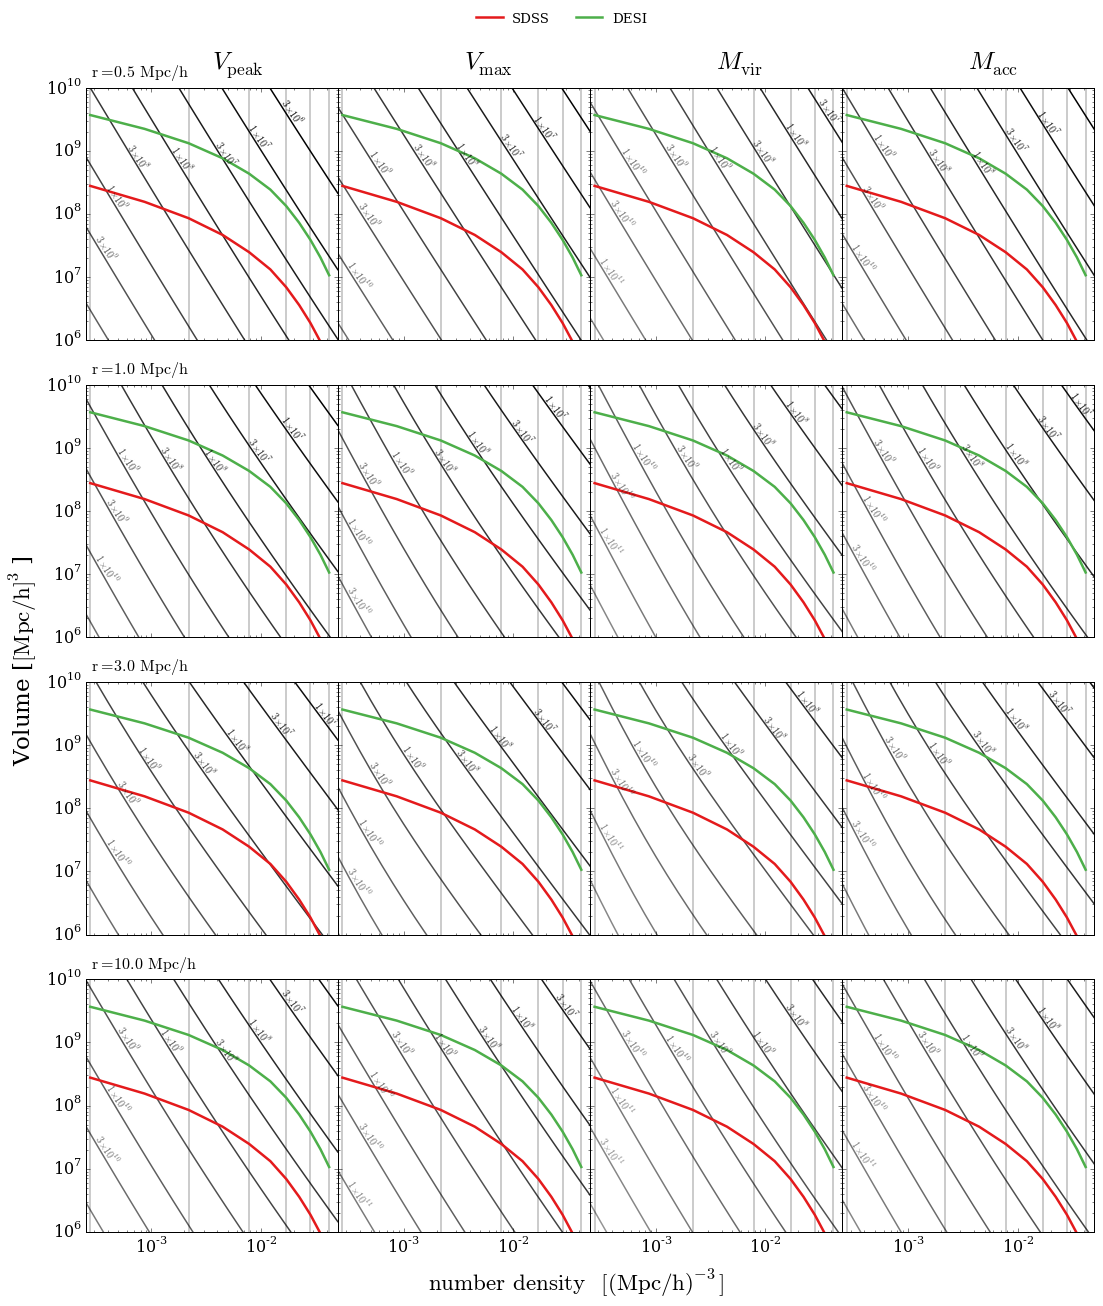

In [37]:
from palettable.colorbrewer.diverging import RdYlGn_11
from palettable.colorbrewer.qualitative import Set1_3
def get_color(i):
    return RdYlGn_11.mpl_colors[::-1][i]
def get_color2(i):
    return Set1_3.mpl_colors[i]
def get_alpha(i):
    return np.linspace(1,0,20)[i]
x = 0.5*(rbins[:-1] + rbins[1:])
def closest_ridx(r):
    return np.abs(x-r).argmin()

case='MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
nd_log_list_this = np.linspace(-3.6, -1.3, 24)
scales = [0.5, 1., 3., 10.]
mass_res = np.array([3.e4, 1.e5, 3.e5, 1.e6, 3.e6,1.e7, 3.e7, 1.e8, 3.e8, 1.e9, 3.e9, 1.e10, 3.e10, 1.e11, 3.e11])
mass_res = np.array([3.e6, 1.e7, 3.e7, 1.e8, 3.e8, 1.e9, 3.e9, 1.e10, 3.e10, 1.e11, 3.e11, 1.e12, 3.e12])
#mass_res = np.logspace(5.,11., 7)
#box_size_this = (200.,250.,333.)
ylim = [1.e6,1.e10]
xlim = [10.**nd_log_list[0], 10.**nd_log_list[-1]]

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(scales), figsize=(4*len(proxies), 4*len(scales)+2) ,\
                       sharex=True, sharey='row')
#plt.subplots_adjust(hspace=0.5)
for i, (ax_row, scale) in enumerate(zip(ax, scales)):
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        pidx = proxies.index(proxy)
        for ii, m in enumerate(mass_res):
            y = np.array([find_boxsize(proxy, scale, nd_log, m)**3 for nd_log in nd_log_list_this])
            ax_this.loglog(10.**nd_log_list_this, y,c = 'k',alpha=get_alpha(ii),lw=1.5)  #label = r'${0:.1f} \times 10^{{{1}}} \rm M_s/h$'.format(*frexp10(m)),
            idxlist = np.where((y - ylim[0])*(y - ylim[1])<0)[0]
            if len(idxlist) > 3:
                idx = idxlist[len(idxlist)*1/4]
                loc = [(nd_log_list_this[idx] - np.log10(xlim[0]))/(np.log10(xlim[1]) - np.log10(xlim[0])),\
                        (np.log10(y[idx]) - np.log10(ylim[0]))/(np.log10(ylim[1]) - np.log10(ylim[0]))]
                slope = (np.log10(y[idx+1]) - np.log10(y[idx]))/(nd_log_list_this[idx+1]-nd_log_list_this[idx])
                #print np.arctan(slope)/np.pi*180
                ax_this.text(10.**nd_log_list_this[idx]*0.9, y[idx], r'${0:.0f} \times 10^{{{1}}}$'.format(*frexp10(m)),\
                         rotation = np.arctan(slope)/np.pi*180*0.8, alpha = get_alpha(ii),fontsize = 10)
        
        #plot settings:
        for nd in np.linspace(-22, -17, 6):
            ax_this.vlines(af.number_density_at(nd), 1.e6, 1.e10, lw = 0.4)

        
        ax_this.loglog(surveys['nd'], surveys['SDSS'], lw = 2.5, label = 'SDSS', c=get_color2(0))
        #ax_this.loglog(surveys['nd'], surveys['GAMA'], lw = 2.5, label = 'GAMA', c=get_color2(1))
        ax_this.loglog(surveys['nd'], surveys['DESI'], lw = 2.5, label = 'DESI', c=get_color2(2))
        ax_this.set_xlim(10.**nd_log_list_this[0],10.**nd_log_list_this[-1]);
        ax_this.set_ylim(1.e6, 1.e10)
        ax_this.minorticks_on();
        if not i: ax_this.text(0.5, 1.15, r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]),\
                               transform=ax_this.transAxes, va='top', fontsize = 25);
        if not j: ax_this.text(0.02, 1.1, r'${{\rm r}} = {0:.1f} \, {{\rm Mpc/h}}$'.format(scale),\
                               transform=ax_this.transAxes, va='top', fontsize='medium');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=4, fontsize='small',\
                                         numpoints=1,bbox_to_anchor = [0.5, 1.2]);
        
plt.tight_layout(0,1.5, rect=(0.04, 0.04, 0.95, 0.95));
fig.text(0.02, 0.5, r'Volume [$\rm [Mpc/h]^3$]', ha='center', va='center', rotation='vertical',\
         fontsize='x-large');
fig.text(0.5, 0.02, r'${\rm number \, density} \; [{{\rm (Mpc/h)}}^{-3}]$', ha='center', va='center',\
         fontsize='x-large');
#fig.text(0.3, 0.98, 'Resolution requirement', fontsize='x-large')
plt.savefig('plots/paper/resolution_requirement.pdf')

In [38]:
import cosmolopy.distance as cd
from cosmolopy import fidcosmo
from scipy.optimize import fsolve

def f_DESI(x, vol):
    dis = cd.comoving_distance(x, **fidcosmo)*fidcosmo['h']
    return 4.*np.pi/3* dis**3 * 14000./41232. - vol
def f_SDSS(x, vol):
    dis = cd.comoving_distance(x, **fidcosmo)*fidcosmo['h']
    return 4.*np.pi/3* dis**3 * 9000./41232. - vol
def vol2z(vol, s):
    if s=='DESI':
        return fsolve(lambda x: f_DESI(x, vol), x0=0.1, xtol=0.01)[0]
    if s=='SDSS':
        return fsolve(lambda x: f_SDSS(x, vol), x0=0.1, xtol=0.01)[0]

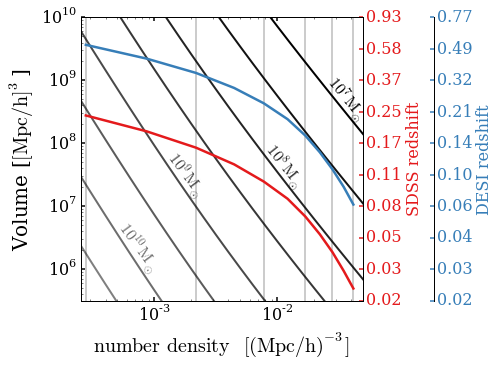

In [41]:
from palettable.colorbrewer.qualitative import Set1_3#RdYlBu_4
def get_color2(i):
    return Set1_3.mpl_colors[-i]
def get_alpha(i):
    return np.linspace(1.,0.,15)[i]

nd_log_list_this = np.linspace(-3.6, -1.3, 24)
xlim = 10.**nd_log_list_this[0], 10.**nd_log_list_this[-1]
ylim = 10.**5.5, 1.e10

proxy = 'vpeak'
r = 1.0
mlist = np.array([1.e7, 3.e7, 1.e8, 3.e8, 1.e9, 3.e9, 1.e10, 3.e10, 1.e11, 3.e11])

fig, host = plt.subplots(figsize = (7,5))
fig.subplots_adjust(right=0.75)
par1 = host.twinx()
par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.25))

for i,m in enumerate(mlist):
    vol = np.array([find_boxsize(proxy, r, nd_log, m)**3 for nd_log in nd_log_list_this])
    host.loglog(10.**nd_log_list_this, vol,\
             label = r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(m)), c='k', alpha = get_alpha(i),lw=2)
    idxlist = np.where((vol - ylim[0])*(vol - ylim[1])<0)[0]
    if len(idxlist)>2 and i%2==0:
        idx = idxlist[len(idxlist)/2]
        slope = (np.log10(vol[idx+1]) - np.log10(vol[idx]))/(nd_log_list_this[idx+1]-nd_log_list_this[idx])
        host.text(10.**nd_log_list_this[idx]*0.9, vol[idx], r'$10^{{{:.0f}}} \rm M_\odot$'.format(np.log10(m)),\
                 rotation = np.arctan(slope)/np.pi*180*0.75, alpha = get_alpha(i))
     
host.loglog(surveys['nd'], surveys['SDSS'], lw = 2.5, label = 'SDSS', c=get_color2(0))
host.loglog(surveys['nd'], surveys['DESI'], lw = 2.5, label = 'DESI', c=get_color2(2))
host.minorticks_on();
#plt.legend(frameon=False, fontsize='small')
for nd in np.linspace(-22, -17, 6):
    host.vlines(af.number_density_at(nd), ylim[0], ylim[1], lw = 0.4)

host.set_ylim(*ylim)
host.set_xlim(*xlim)
par1.set_ylim(*np.log10(ylim))
par2.set_ylim(*np.log10(ylim))
par1.set_ylabel("SDSS redshift")
par2.set_ylabel("DESI redshift")
par1.yaxis.label.set_color(get_color2(0))
par2.yaxis.label.set_color(get_color2(2))
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors='k', **tkw)

#set the tick labels for the redshift y axis
par1.tick_params(axis='y', colors=get_color2(0), **tkw)
par2.tick_params(axis='y', colors=get_color2(2), **tkw)
host.tick_params(axis='x', **tkw)
par1.locator_params(axis='y',nbins=10)
par2.locator_params(axis='y',nbins=10)
vol1 = par1.get_yticks().tolist()
vol2 = par2.get_yticks().tolist()
z1 = ['{:.2f}'.format(vol2z(10.**v,'SDSS')) for v in vol1]
z2 = ['{:.2f}'.format(vol2z(10.**v,'DESI')) for v in vol2]
par1.set_yticklabels(z1)
par2.set_yticklabels(z2)

host.set_xlabel(r'${\rm number \, density} \; [{{\rm (Mpc/h)}}^{-3}]$', fontsize = 20)
host.set_ylabel(r'Volume [$\rm [Mpc/h]^3$]', fontsize = 20)

plt.tight_layout(0,1.5, rect=(0.01, 0.01, 0.99, 0.99));
plt.savefig('plots/paper/resolution_requirement_oneplot.pdf')

the resolution needed for a few number densities (ie, intersection between the red line and resolution lines), as a function of scale.

In [42]:
from scipy.optimize import fsolve

def res_func(x, proxy = 'vpeak', nd_log=-2.5, vol=10.**8 , r=1.):
    Npph = nd_M_2_Npph(nd_log, x)
    return missing_pairs_int(proxy, Npph, r)**2 - 2*sample_variance_int(proxy, vol**(1./3.),r, nd_log)

def find_res(proxy, nd_log, vol, r):
    def f(x): return res_func(x, proxy = proxy, nd_log=nd_log, vol = vol, r=r)
    return fsolve(f, 10.**8, xtol = 0.01)



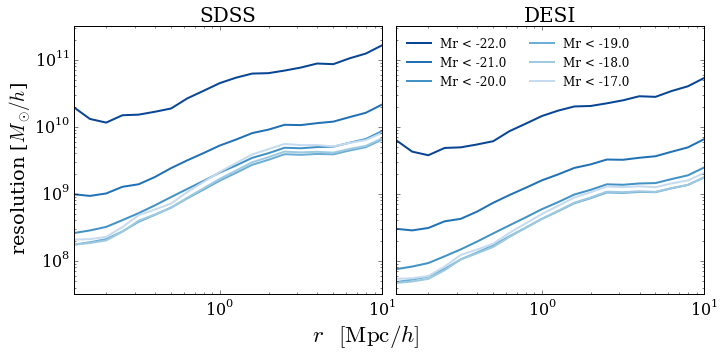

In [43]:
from palettable.colorbrewer.sequential import Blues_8
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]

sur = ['SDSS', 'DESI']
scale = np.logspace(-0.9, 1.0, 20)
mag_list = (-22.,-21.,-20.,-19.,-18.,-17.)

fig, axarr = plt.subplots(nrows = 1, ncols=len(sur), figsize=(5*len(sur), 5) ,\
                       sharex=True, sharey=True)
for i, (ax,s) in enumerate(zip(axarr, sur)):
    for j,mag in enumerate(mag_list):
        idx = np.abs(surveys['magnitude']-mag).argmin()
        nd = surveys['nd'][idx]
        vol = surveys[s][idx]
        mass_req = np.array([find_res('vpeak', np.log10(nd), vol, r) for r in scale])
        ax.loglog(scale, mass_req, label = 'Mr < {}'.format(mag), c=get_color(j), lw=2)
        ax.set_title(s, fontsize = 20);
        if i==1: ax.legend(frameon=False, loc='best', fontsize = 12, ncol = 2)
    
    ax.set_ylim(10**7.5, 10**11.5)
    ax.set_xlim(scale[0],scale[-1])

plt.tight_layout(0, rect=(0.04, 0.08, 0.99, 0.95));
fig.text(0.02, 0.5, r'resolution [$M_\odot /h$]', ha='center', va='center', rotation='vertical', fontsize='large');
fig.text(0.5, 0.035, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
plt.savefig('plots/paper/resolution_for_survey_vs_scale.pdf')

# test

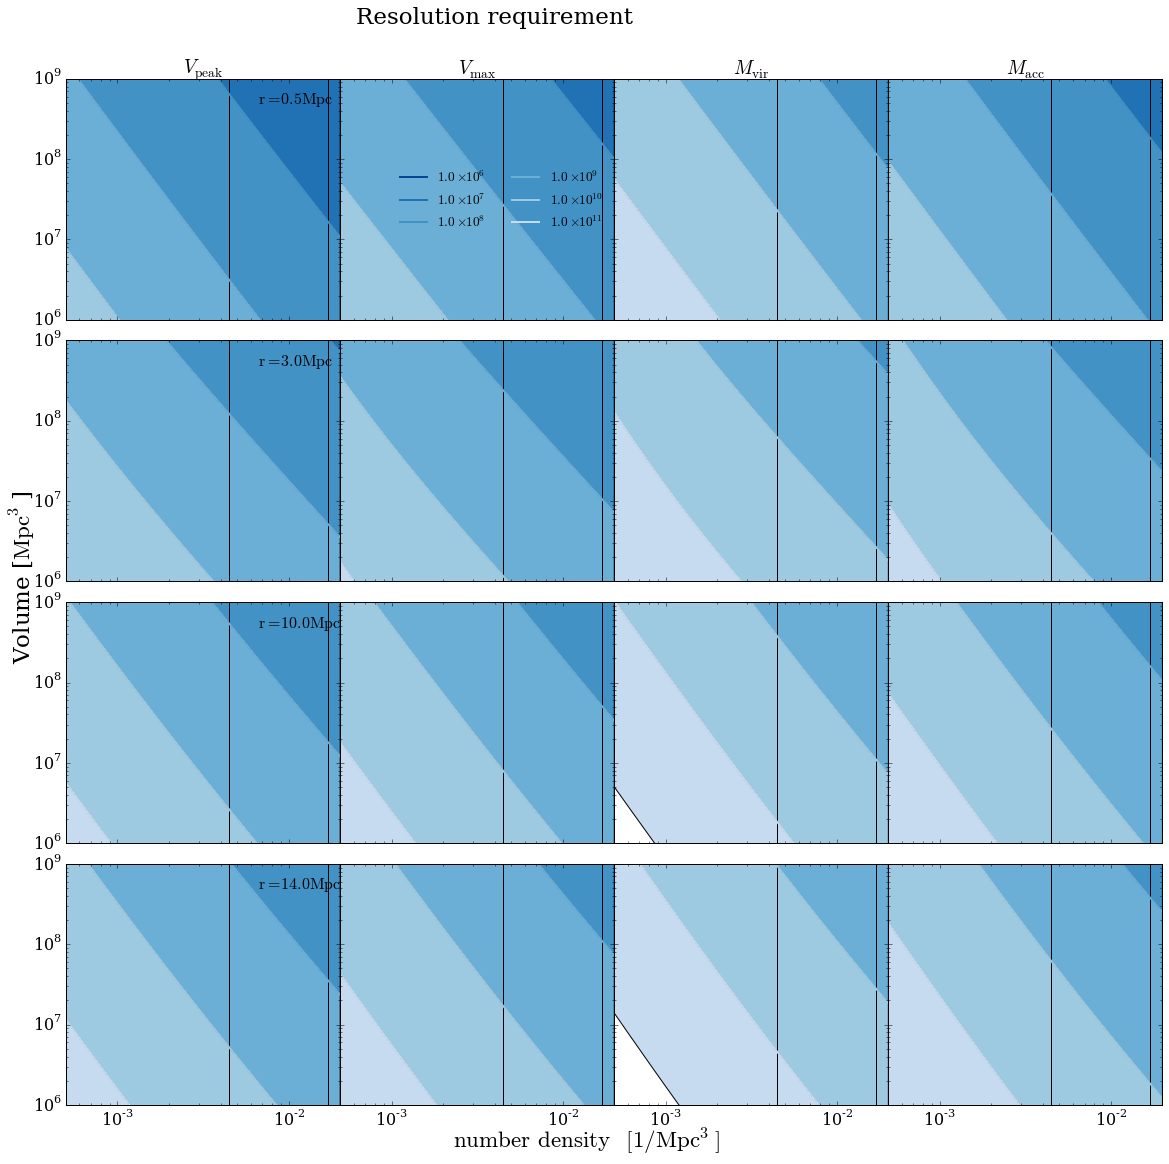

In [44]:
# fill_between
from palettable.colorbrewer.sequential import Blues_7#RdYlBu_4
def get_color(i):
    return Blues_7.mpl_colors[::-1][i]
x = 0.5*(rbins[:-1] + rbins[1:])
def closest_ridx(r):
    return np.abs(x-r).argmin()

case='MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
scales = [ 0.5, 3.,10. , 14. ]
mass_res = np.logspace(5.5,11.5,7)

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(scales), figsize=(4*len(proxies), 4*len(scales)), sharex=True, sharey='row')
for i, (ax_row, scale) in enumerate(zip(ax, scales)):
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        pidx = proxies.index(proxy)
        for ii, (m1,m2) in enumerate(zip(mass_res[:-1], mass_res[1:])):
            y1 = np.array([find_boxsize(proxy, scale, nd_log, m1)**3 for nd_log in nd_log_list])
            y2 = np.array([find_boxsize(proxy, scale, nd_log, m2)**3 for nd_log in nd_log_list])
            ax_this.loglog(10.**nd_log_list, y1,\
                             label = r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(m1*10**(0.5))), c=get_color(ii),lw=2)
            ax_this.fill_between(10.**nd_log_list, y1, y2, facecolor = get_color(ii))
        #plot settings:
        ax_this.vlines(af.number_density_at(-19), 1.e6, 1.e9)
        ax_this.vlines(af.number_density_at(-20.5), 1.e6, 1.e9)
        ax_this.vlines(af.number_density_at(-22), 1.e6, 1.e9)
        ax_this.set_xlim(10.**nd_log_list[0],10.**nd_log_list[-1]);
        ax_this.set_ylim(1.e6, 1.e9)
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.7, 0.95, r'${{\rm r}} = {0:.1f} {{\rm Mpc}}$'.format(scale), transform=ax_this.transAxes, va='top', fontsize='medium');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize='small', numpoints=1);
        #if i==0 and j==3: ax_this.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, numpoints=1 , fontsize='medium');    
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'Volume [$\rm Mpc^3$]', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'${\rm number \, density} \; [1/{{\rm Mpc}}^3]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Resolution requirement', fontsize='x-large')
#plt.savefig('plots/resolution_requirement.png')

In [45]:
0.22*3e5

66000.0

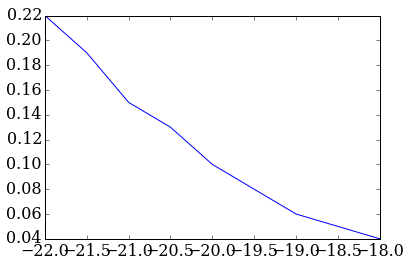

In [46]:
magnitude = np.linspace(-22, -18, 9)
zlim = np.array([0.22,0.19,0.15,0.13,0.10,0.08,0.06,0.05,0.04])
plt.plot(magnitude, zlim)

In [47]:
import cosmolopy.distance as cd
from cosmolopy import fidcosmo
dis = cd.comoving_distance(zlim, **fidcosmo)*fidcosmo['h']
SDSS_vol = 4.*np.pi/3* dis**3 * 2500./41232.
SDSS_nd = af.number_density_at(magnitude)

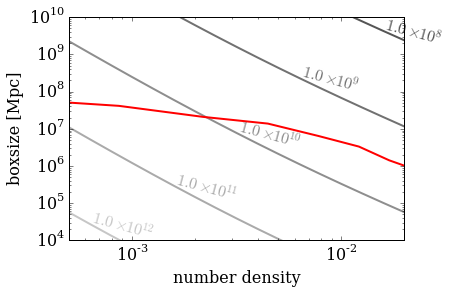

In [48]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]
def get_alpha(i):
    return np.linspace(1.,0.,10)[i]

xlim = 10.**nd_log_list[0], 10.**nd_log_list[-1]
ylim = 1.e4, 1.e10

proxy = 'mvir'
mlist = np.logspace(5,12, 8)
for i,m in enumerate(mlist):
    vol = np.array([find_boxsize(proxy, 0.8, nd_log, m)**3 for nd_log in nd_log_list])
    plt.loglog(10.**nd_log_list, vol,\
             label = r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(m)), c='k', alpha = get_alpha(i),lw=2)
    idxlist = np.where((vol - 1.e4)*(vol - 1.e10)<0)[0]
    if len(idxlist)>2:
        idx = idxlist[len(idxlist)/2]
        loc = [(nd_log_list[idx] - np.log10(xlim[0]))/(np.log10(xlim[1]) - np.log10(xlim[0])),\
                (np.log10(vol[idx]) - np.log10(ylim[0]))/(np.log10(ylim[1]) - np.log10(ylim[0]))]
        plt.text(10.**nd_log_list[idx], vol[idx], r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(m)),\
                 rotation = -15, alpha = get_alpha(i))
    
    
    
plt.loglog(SDSS_nd, SDSS_vol, lw = 2, c = 'r', label = 'SDSS')
#plt.legend(frameon=False, fontsize='small')

plt.ylim(1e4,1e10)
plt.xlim(10.**nd_log_list[0], 10.**nd_log_list[-1])
plt.xlabel('number density')
plt.ylabel('boxsize [Mpc]')

In [49]:
xx = nd_log_list
yy = np.linspace(4,10,20)
X, Y = np.meshgrid(xx, yy)
Z = np.zeros_like(X)
for i, nd_log in enumerate(xx):
    for j, v_log in enumerate(yy):
        Z[i,j] = find_boxsize('mvir', 1.5, nd_log)

TypeError: find_boxsize() takes at least 4 arguments (3 given)

In [ ]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]

r=10
proxy = 'vpeak'
mlist = np.logspace(7,11, 5)
for i,(m1,m2) in enumerate(zip(mlist[:-1], mlist[1:])):
    plt.semilogx(10.**nd_log_list, [find_boxsize(proxy, r, nd_log, m1) for nd_log in nd_log_list],\
             label = r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(m1)), c=get_color(i),lw=2)
    xx = 10.**nd_log_list
    y1 = np.array([find_boxsize(proxy, r, nd_log, m1) for nd_log in nd_log_list])
    y2 = np.array([find_boxsize(proxy, r, nd_log, m2) for nd_log in nd_log_list])
    
    #plt.semilogx(10.**nd_log_list,y1)
    plt.fill_between(xx, y1, y2,  facecolor=get_color(i))
plt.legend(frameon=False, fontsize='small',ncol = 2, bbox_to_anchor = [0.8, 1.3])
plt.ylim(0,1000)
plt.xlim(10.**nd_log_list[0], 10.**nd_log_list[-1])
plt.xlabel('number density')
plt.ylabel('boxsize [Mpc]')

In [ ]:
x